In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import os

In [51]:
current_path = os.getcwd()
current_path

data = pd.read_csv(current_path + '/processed_shorts.csv')
data.head()

,video_id,title,published_at,date,time,hour,duration_seconds,view_count,like_count,comment_count,has_hashtags,hashtag_count,has_emojis,emoji_count,clean_title,caps_percentage,title_length,sentiment_polarity,sentiment_subjectivity,time_since_last_post
0,8naAsPTxdHg,my life literally FALLING APART 😭 #shorts #dan...,2022-06-05 22:00:05+00:00,2022-06-05,22:00:05,22,10.0,7519,172,5,True,2,True,1,my life literally FALLING APART 😭,44.444444,33,0.000000,0.000000,0.0
1,_r8i59rV_ZY,Did NOT expect him to do THAT 🤣🐶 #shorts #pupp...,2022-06-06 22:00:12+00:00,2022-06-06,22:00:12,22,15.0,2201,70,3,True,3,True,2,Did NOT expect him to do THAT 🤣🐶,34.782609,32,0.000000,0.000000,86407.0
2,rPdf8Nq215M,NEW FAV DANCE 👯‍♀️ #shorts #dance,2022-06-08 22:00:18+00:00,2022-06-08,22:00:18,22,11.0,4159,137,0,True,2,True,1,NEW FAV DANCE 👯‍♀️,100.000000,18,0.136364,0.454545,172806.0
3,jGRkmZJqG-c,this remix is TOO catchy 💃😍 #shorts #lizzo #da...,2022-06-09 22:00:30+00:00,2022-06-09,22:00:30,22,15.0,2022,59,4,True,3,True,2,this remix is TOO catchy 💃😍,15.000000,27,0.000000,0.000000,86412.0
4,bYhAGC0ocUw,what are my hands doing LOL? 👀😂 #shorts #flexi...,2022-06-11 22:00:21+00:00,2022-06-11,22:00:21,22,5.0,24230,318,8,True,2,True,2,what are my hands doing LOL? 👀😂,13.636364,31,0.800000,0.700000,172791.0


<Axes: xlabel='day_of_week'>

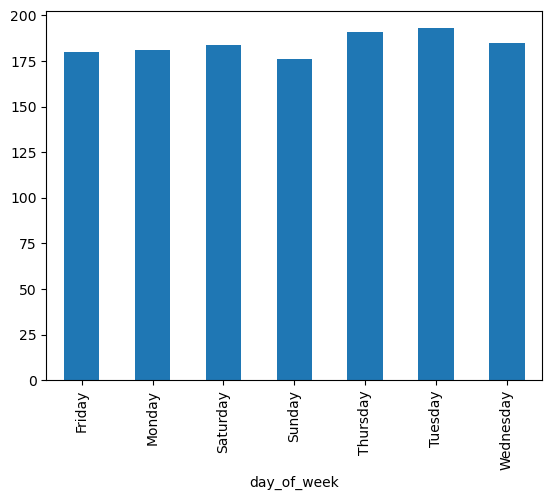

In [87]:
data['engagement_rate'] = (data['comment_count'] + data['like_count']) / data['view_count']
data['day_of_week'] = pd.to_datetime(data['date']).dt.day_name()
data.groupby('day_of_week')['view_count'].count().plot(kind='bar')

In [64]:
data_simplified = data[['title_length', 'duration_seconds', 'caps_percentage', 'sentiment_polarity', 'sentiment_subjectivity', 'engagement_rate']]

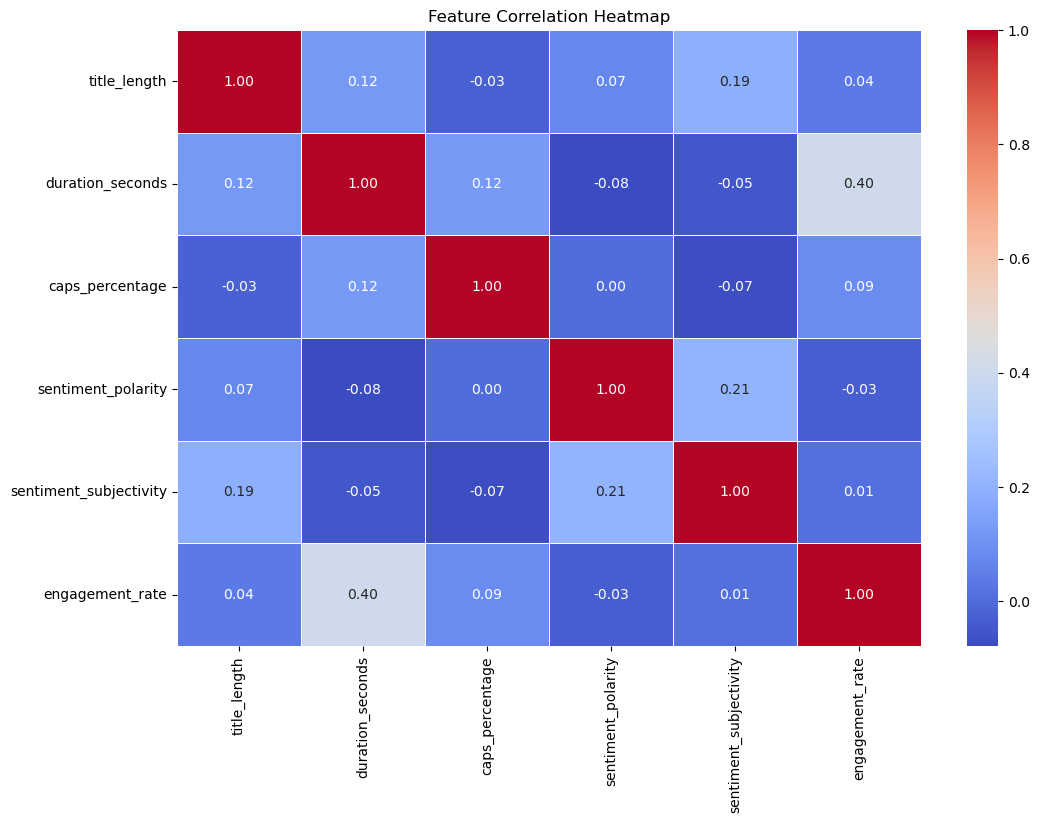

In [65]:
corr = data_simplified.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

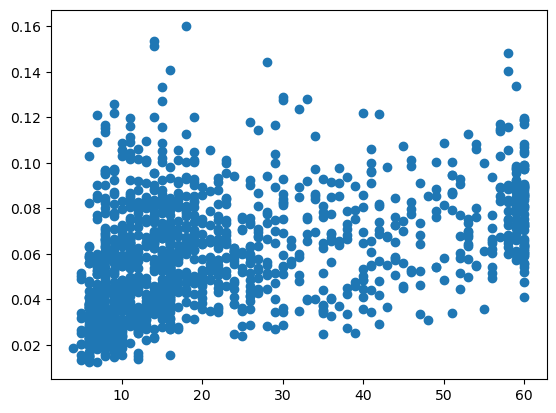

In [69]:
x = data['duration_seconds']
y = data['engagement_rate']
plt.scatter(x, y)
plt.show()

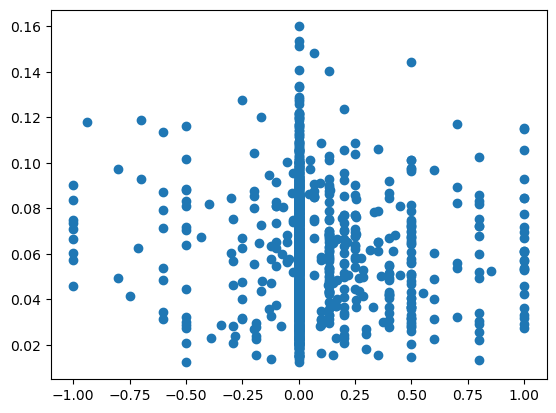

In [88]:
x = data['sentiment_polarity']
y = data['engagement_rate']
plt.scatter(x, y)
plt.show()

<Axes: xlabel='has_hashtags'>

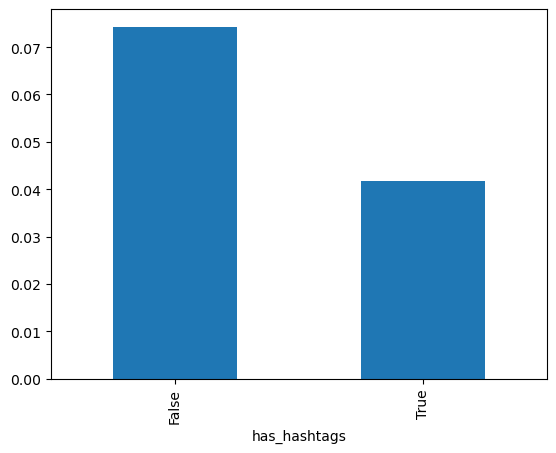

In [91]:
data.groupby('has_hashtags')['engagement_rate'].mean().plot(kind='bar')

In [94]:
data['sentiment'] = data['sentiment_polarity'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')
data.head()

,video_id,title,published_at,date,time,hour,duration_seconds,view_count,like_count,comment_count,...,emoji_count,clean_title,caps_percentage,title_length,sentiment_polarity,sentiment_subjectivity,time_since_last_post,engagement_rate,day_of_week,sentiment
0,8naAsPTxdHg,my life literally FALLING APART 😭 #shorts #dan...,2022-06-05 22:00:05+00:00,2022-06-05,22:00:05,22,10.0,7519,172,5,...,1,my life literally FALLING APART 😭,44.444444,33,0.000000,0.000000,0.0,0.023540,Sunday,neutral
1,_r8i59rV_ZY,Did NOT expect him to do THAT 🤣🐶 #shorts #pupp...,2022-06-06 22:00:12+00:00,2022-06-06,22:00:12,22,15.0,2201,70,3,...,2,Did NOT expect him to do THAT 🤣🐶,34.782609,32,0.000000,0.000000,86407.0,0.033167,Monday,neutral
2,rPdf8Nq215M,NEW FAV DANCE 👯‍♀️ #shorts #dance,2022-06-08 22:00:18+00:00,2022-06-08,22:00:18,22,11.0,4159,137,0,...,1,NEW FAV DANCE 👯‍♀️,100.000000,18,0.136364,0.454545,172806.0,0.032941,Wednesday,positive
3,jGRkmZJqG-c,this remix is TOO catchy 💃😍 #shorts #lizzo #da...,2022-06-09 22:00:30+00:00,2022-06-09,22:00:30,22,15.0,2022,59,4,...,2,this remix is TOO catchy 💃😍,15.000000,27,0.000000,0.000000,86412.0,0.031157,Thursday,neutral
4,bYhAGC0ocUw,what are my hands doing LOL? 👀😂 #shorts #flexi...,2022-06-11 22:00:21+00:00,2022-06-11,22:00:21,22,5.0,24230,318,8,...,2,what are my hands doing LOL? 👀😂,13.636364,31,0.800000,0.700000,172791.0,0.013454,Saturday,positive


<Axes: xlabel='sentiment'>

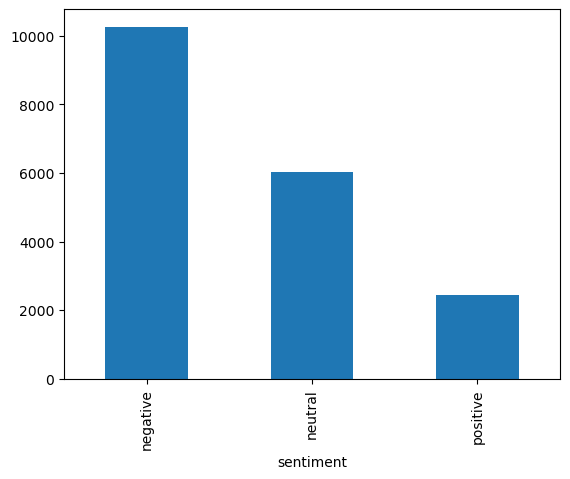

In [98]:
data.groupby('sentiment')['like_count'].mean().plot(kind='bar')

In [106]:
words = data['title'].apply(lambda x: len(x.split()))
average_words = words.mean()
average_words

6.926356589147287

hi